In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")

df['day'] = pd.to_datetime(df['date'], dayfirst=True)

df = df.drop(['date'], axis = 1)
print(df.columns)

Index(['region', 'sequences', 'GISAID_uploads', 'proportion', 'day'], dtype='object')


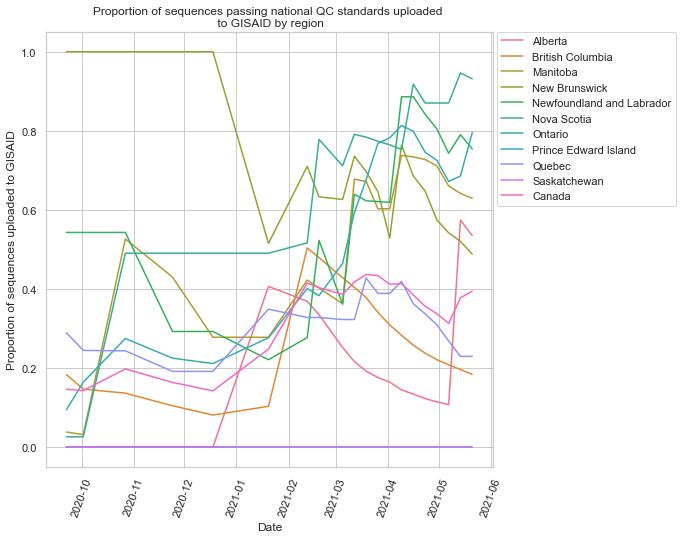

In [50]:
dims = (8, 8)
fig, ax = plt.subplots(figsize= dims)
sns.set_theme(style="whitegrid")
sns.lineplot(x = "day", y = "proportion", hue = "region", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Proportion of sequences passing national QC standards uploaded \n to GISAID by region")
plt.ylabel("Proportion of sequences uploaded to GISAID")
plt.xlabel("Date")
plt.xticks(rotation=70)

#plt.show()
plt.savefig('plots/GISAID_uploads.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

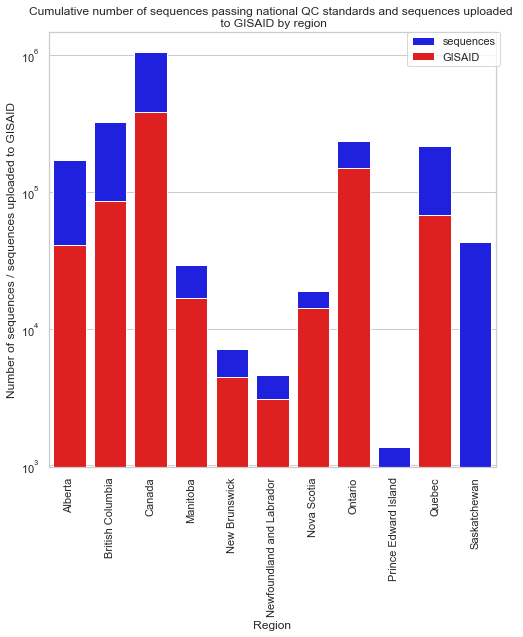

In [51]:
plt.clf()
dims = (8, 8)
fig, ax = plt.subplots(figsize= dims)
sns.set_theme(style="whitegrid")
sns.barplot(x = sorted(df['region'].unique()), y = list(df.groupby(['region'])['sequences'].agg('sum')), color="blue", label= "sequences")
sns.barplot(x = sorted(df['region'].unique()), y = list(df.groupby(['region'])['GISAID_uploads'].agg('sum')), color= "red", label="GISAID")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of sequences passing national QC standards and sequences uploaded \n to GISAID by region")
plt.ylabel("Number of sequences / sequences uploaded to GISAID")
plt.xlabel("Region")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.yscale("log")

#plt.show()
plt.savefig('plots/GISAID_uploads.png', bbox_inches='tight')

In [6]:
plt.clf()
dims = (8, 8)
fig, ax = plt.subplots(figsize= dims)
sns.set_theme(style="whitegrid")
sns.barplot(x = sorted(df['region'].unique()), y = list(df.groupby(['region'])['sequences'].agg('sum')), color="blue", label= "sequences")
sns.barplot(x = sorted(df['region'].unique()), y = list(df.groupby(['region'])['GISAID_uploads'].agg('sum')), color= "red", label="GISAID")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of sequences passing national QC standards and sequences uploaded \n to GISAID by region")
plt.ylabel("Number of sequences / sequences uploaded to GISAID")
plt.xlabel("Region")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70)

region
Alberta                       170633
British Columbia              323177
Canada                       1049542
Manitoba                       29044
New Brunswick                   7133
Newfoundland and Labrador       4569
Nova Scotia                    18717
Ontario                       235022
Prince Edward Island            1357
Quebec                        217319
Saskatchewan                   42571
Name: sequences, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

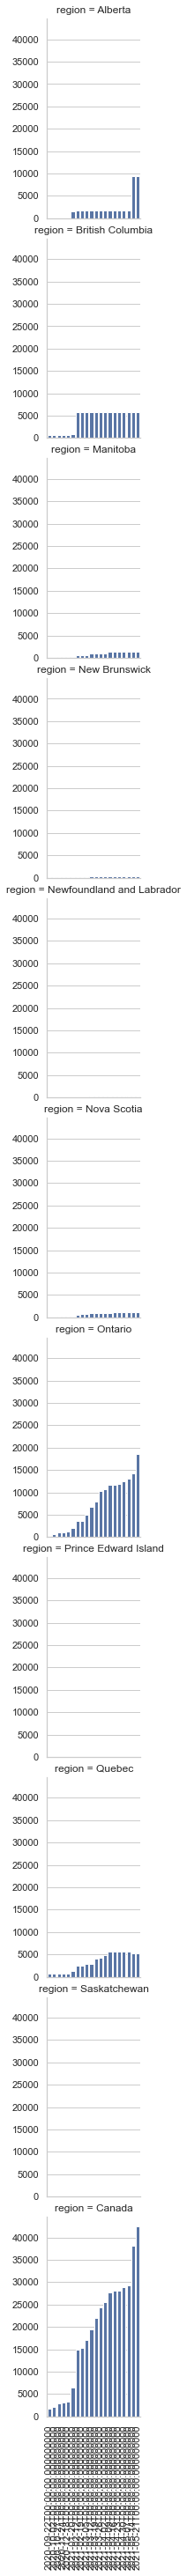

In [47]:
plt.clf()
g = sns.FacetGrid(df, row="region", height=3.5, aspect=.65)
g.map_dataframe(sns.barplot, x="day",y="GISAID_uploads")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)



None
